# Problem Statement
## Fake News Classification

The train dataset contains three features: title, text, and label. The train dataset has 32,470 rows, and the test dataset has 8,117 rows. The dataset can be used to create classification models that can predict whether news articles are fake or not based on their titles or texts.

# Importing the libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Train data 

In [2]:
train_data1 = pd.read_csv('train.csv', delimiter=';')
train_data1.head()


,Unnamed: 0,title,text,label
0,0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1
1,1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1
2,2,FAIL! The Trump Organization’s Credit Score W...,While the controversy over Trump s personal ta...,0
3,3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1
4,4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0


In [3]:
train_data1.shape

(24353, 4)

In [4]:
validation_data2=pd.read_csv('evaluation.csv',delimiter=';')

In [5]:
validation_data2.head()


,Unnamed: 0,title,text,label
0,0,"Sanders back in U.S. Senate, blasts 'coloniali...",WASHINGTON (Reuters) - Democratic U.S. preside...,1
1,1,Kremlin: Syria peoples' congress being 'active...,MOSCOW (Reuters) - A proposal to convene a con...,1
2,2,Oregon Cop Convicted Of Shattering Biker’s Co...,"In a baffling fit of rage, an Oregon State Pol...",0
3,3,Twitter Erupts With Glee Over #CruzSexScandal...,The last thing any politician running for the ...,0
4,4,MUST WATCH VIDEO: Obama Tries To Trash Trump B...,This is too good to miss! Mr. Teleprompter did...,0


In [6]:
validation_data2.shape

(8117, 4)

In [7]:
# Stack them row-wise
train_data = pd.concat([train_data1,validation_data2], ignore_index=True)

In [8]:
train_data

,Unnamed: 0,title,text,label
0,0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1
1,1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1
2,2,FAIL! The Trump Organization’s Credit Score W...,While the controversy over Trump s personal ta...,0
3,3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1
4,4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0
...,...,...,...,...
32465,8112,Sean Hannity Throws Hissy Fit After Real Repo...,"Just like Donald Trump, Sean Hannity has a thi...",0
32466,8113,FORMER ASST FBI DIRECTOR WARNS ANTI-TRUMP KABA...,Former Asst. FBI Director James Kallstrom spok...,0
32467,8114,John McCain: Trump’s Attacks On The Press Are...,Donald Trump has declared the media to be the...,0
32468,8115,Syria's Deir al-Zor air base working again: st...,BEIRUT (Reuters) - The Deir al-Zor military ai...,1


In [9]:
train_data.shape

(32470, 4)

In [10]:
df_train=train_data[['title','text','label']]

In [11]:
df_train

,title,text,label
0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1
1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1
2,FAIL! The Trump Organization’s Credit Score W...,While the controversy over Trump s personal ta...,0
3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1
4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0
...,...,...,...
32465,Sean Hannity Throws Hissy Fit After Real Repo...,"Just like Donald Trump, Sean Hannity has a thi...",0
32466,FORMER ASST FBI DIRECTOR WARNS ANTI-TRUMP KABA...,Former Asst. FBI Director James Kallstrom spok...,0
32467,John McCain: Trump’s Attacks On The Press Are...,Donald Trump has declared the media to be the...,0
32468,Syria's Deir al-Zor air base working again: st...,BEIRUT (Reuters) - The Deir al-Zor military ai...,1


In [12]:
df_train['label'].value_counts()

label
1    17560
0    14910
Name: count, dtype: int64

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32470 entries, 0 to 32469
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   32470 non-null  object
 1   text    32470 non-null  object
 2   label   32470 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 761.1+ KB


In [14]:
df_train.isna().sum()

title    0
text     0
label    0
dtype: int64

# 2. Test data

In [15]:
test_data=pd.read_csv('test.csv',delimiter=';')
test_data

,Unnamed: 0,title,text,label
0,0,"Live from New York, it's a Trump-Clinton remat...",NEW YORK (Reuters) - Veteran actor and frequen...,1
1,1,Catalan separatists to lose majority in tight ...,BARCELONA (Reuters) - Catalonia s independence...,1
2,2,North Carolina governor concedes election to D...,"WINSTON-SALEM, N.C. (Reuters) - North Carolina...",1
3,3,Draft Senate Iran legislation sets tough new U...,WASHINGTON (Reuters) - Draft legislation respo...,1
4,4,California governor taps U.S. Representative B...,"SACRAMENTO, Calif. (Reuters) - California Gove...",1
...,...,...,...,...
8112,8112,Sanders at Vatican says rich-poor gap worse th...,VATICAN CITY (Reuters) - U.S. presidential can...,1
8113,8113,how trump happened,force and fanaticism wahhabism in saudi arabi...,1
8114,8114,Turkey will take two steps if Germany takes on...,"ISTANBUL (Reuters) - Turkey, whose relations w...",1
8115,8115,BREAKING: DEVICE THAT BUSTED HILLARY CLINTON D...,Here s why Clinton and Abedin should be flippi...,0


In [16]:
test_data.shape

(8117, 4)

In [17]:
df_test=test_data[['title','text','label']]

In [18]:
df_test

,title,text,label
0,"Live from New York, it's a Trump-Clinton remat...",NEW YORK (Reuters) - Veteran actor and frequen...,1
1,Catalan separatists to lose majority in tight ...,BARCELONA (Reuters) - Catalonia s independence...,1
2,North Carolina governor concedes election to D...,"WINSTON-SALEM, N.C. (Reuters) - North Carolina...",1
3,Draft Senate Iran legislation sets tough new U...,WASHINGTON (Reuters) - Draft legislation respo...,1
4,California governor taps U.S. Representative B...,"SACRAMENTO, Calif. (Reuters) - California Gove...",1
...,...,...,...
8112,Sanders at Vatican says rich-poor gap worse th...,VATICAN CITY (Reuters) - U.S. presidential can...,1
8113,how trump happened,force and fanaticism wahhabism in saudi arabi...,1
8114,Turkey will take two steps if Germany takes on...,"ISTANBUL (Reuters) - Turkey, whose relations w...",1
8115,BREAKING: DEVICE THAT BUSTED HILLARY CLINTON D...,Here s why Clinton and Abedin should be flippi...,0


In [19]:
df_test['label'].value_counts()

label
1    4364
0    3753
Name: count, dtype: int64

In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8117 entries, 0 to 8116
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   8117 non-null   object
 1   text    8117 non-null   object
 2   label   8117 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 190.4+ KB


In [21]:
df_test.isna().sum()

title    0
text     0
label    0
dtype: int64

# As per the train data set the
## Independent features - Title and text
## Dependent feature - label

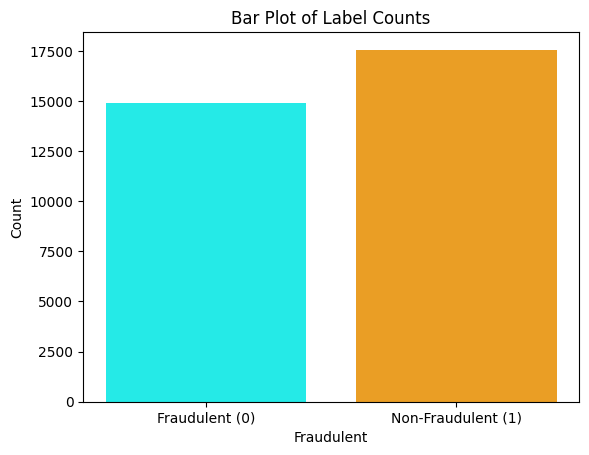

In [27]:
value_counts1 = df_train['label'].value_counts()
# Create bar plot
plt.bar(value_counts1.index, value_counts1.values, color=['#EA9E25', '#25EAE7'])
# Add labels and title
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.title('Bar Plot of Label Counts')
plt.xticks([1, 0], ['Non-Fraudulent (1)', 'Fraudulent (0)'])
plt.show()

# As per the test data set the
## Independent features - Title and text
## Dependent feature - label

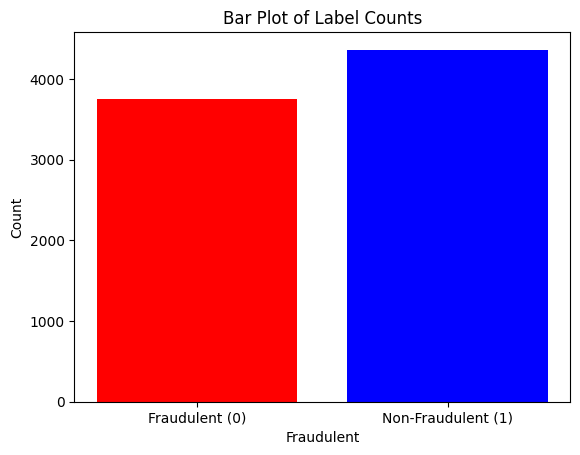

In [28]:
value_counts2 = df_test['label'].value_counts()
# Create bar plot
plt.bar(value_counts2.index, value_counts2.values, color=['blue', 'red'])

# Add labels and title
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.title('Bar Plot of Label Counts')
plt.xticks([1, 0], ['Non-Fraudulent (1)', 'Fraudulent (0)'])
plt.show()

# From the visualization we can say there are the output categories are two 0 and 1
## Natural Language Processing (NLP)
# Split data into train and test

In [25]:
# from sklearn.model_selection import train_test_split,GridSearchCV

In [26]:
# x_train,x_test,y_train,y_test = train_test_split(df.loc[:,'title':'text'],df['label'],test_size=0.25, random_state = 355)

In [23]:
x_train=df_train.loc[:,'title':'text']
y_train=df_train['label']

In [24]:
x_test=df_test.loc[:,'title':'text']
y_test=df_test['label']

In [25]:
print(x_train.shape)
print(x_test.shape)

(32470, 2)
(8117, 2)


In [26]:
x_train["title"] = x_train["title"].str.replace("[^a-zA-Z0-9 ]","",regex=True)
x_test["title"] = x_test["title"].str.replace("[^a-zA-Z0-9 ]","",regex=True)

In [27]:
x_train["text"] = x_train["text"].str.replace("[^a-zA-Z0-9 ]","",regex=True)
x_test["text"] = x_test["text"].str.replace("[^a-zA-Z0-9 ]","",regex=True)

In [28]:
x_train

,title,text
0,Palestinians switch off Christmas lights in Be...,RAMALLAH West Bank Reuters Palestinians switc...
1,China says Trump call with Taiwan president wo...,BEIJING Reuters US Presidentelect Donald Trum...
2,FAIL The Trump Organizations Credit Score Wil...,While the controversy over Trump s personal ta...
3,Zimbabwe military chiefs China trip was normal...,BEIJING Reuters A trip to Beijing last week b...
4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...
...,...,...
32465,Sean Hannity Throws Hissy Fit After Real Repo...,Just like Donald Trump Sean Hannity has a thin...
32466,FORMER ASST FBI DIRECTOR WARNS ANTITRUMP KABAL...,Former Asst FBI Director James Kallstrom spoke...
32467,John McCain Trumps Attacks On The Press Are H...,Donald Trump has declared the media to be the...
32468,Syrias Deir alZor air base working again state...,BEIRUT Reuters The Deir alZor military airpor...


# Stop words remove

In [29]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SNEHANGSHU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
stopwords_list = stopwords.words('english')

# Applying TF-IDF

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
vectorizer_title = TfidfVectorizer(stop_words= stopwords_list,ngram_range= (2,2),max_features=2500)
vectorizer_title.fit(x_train['title'])

vectorizer_text = TfidfVectorizer(stop_words= stopwords_list,ngram_range= (2,2),max_features=2500)
vectorizer_text.fit(x_train['text'])

TfidfVectorizer(max_features=2500, ngram_range=(2, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [33]:
x_train_title = vectorizer_title.transform(x_train["title"])
x_test_title = vectorizer_title.transform(x_test["title"])


x_train_text = vectorizer_text.transform(x_train["text"])
x_test_text = vectorizer_text.transform(x_test["text"])

In [34]:
x_train_title

<32470x2500 sparse matrix of type '<class 'numpy.float64'>'
	with 41166 stored elements in Compressed Sparse Row format>

In [35]:
x_test_text

<8117x2500 sparse matrix of type '<class 'numpy.float64'>'
	with 156661 stored elements in Compressed Sparse Row format>

In [36]:
x_train_title.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
x_train_final = np.hstack((x_train_title.toarray(),x_train_text.toarray()))


In [38]:
x_test_final = np.hstack((x_test_title.toarray(),x_test_text.toarray()))

In [39]:
x_test_final.shape

(8117, 5000)

In [40]:
x_train_final.shape

(32470, 5000)

In [41]:
import pickle
with open("vectorizer_title.pkl","wb") as f:
    pickle.dump(vectorizer_title,f)

In [139]:
import pickle
with open("vectorizer_text.pkl","wb") as f:
    pickle.dump(vectorizer_text,f)

# Now applying Machine Learning Models##
# Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression()

In [77]:
from sklearn.model_selection import GridSearchCV
parameter = {'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40],'max_iter':[100,200,300]}

In [83]:
classifier_regressor=GridSearchCV(logistic_regression_model,param_grid=parameter,scoring='accuracy',cv = 5)

In [84]:
classifier_regressor.fit(x_train_final,y_train)

C:\Users\SNEHANGSHU\Desktop\data science\project 2024\venv\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
300 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SNEHANGSHU\Desktop\data science\project 2024\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SNEHANGSHU\Desktop\data science\project 2024\venv\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Use

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [85]:
print(classifier_regressor.best_params_)

{'C': 2, 'max_iter': 100, 'penalty': 'l2'}


In [86]:
print(classifier_regressor.best_score_)

0.9647674776716968


In [87]:
logistic_regression_model = LogisticRegression(C= 2, max_iter = 100, penalty = 'l2')
logistic_regression_model.fit(x_train_final,y_train)

LogisticRegression(C=2)

In [88]:
y_predict = logistic_regression_model.predict(x_test_final)
y_predict

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [89]:
from sklearn.metrics import accuracy_score,classification_report

In [90]:
logistic_regression_modesl_accurecy = accuracy_score(y_predict,y_test)
logistic_regression_modesl_accurecy

0.9643957127017371

In [91]:
logistic_regression_modesl_classification_report =classification_report(y_predict,y_test)
print(logistic_regression_modesl_classification_report)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3814
           1       0.96      0.97      0.97      4303

    accuracy                           0.96      8117
   macro avg       0.96      0.96      0.96      8117
weighted avg       0.96      0.96      0.96      8117



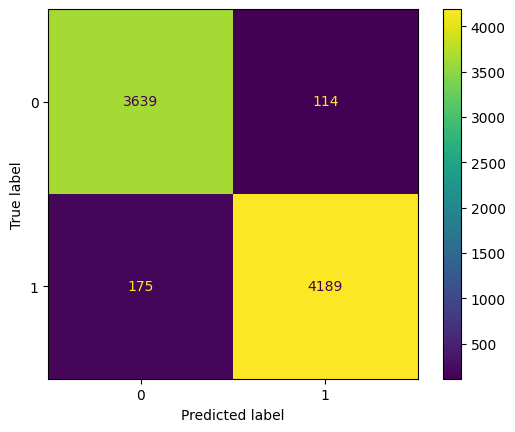

In [92]:
import sklearn.metrics
sklearn.metrics.ConfusionMatrixDisplay.from_estimator(logistic_regression_model, x_test_final, y_test)

In [140]:
import pickle
with open("logistic_regression_model.pkl", "wb") as f:
    pickle.dump(logistic_regression_model, f)

# Naive Bayes

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

In [94]:
naive_byas_model = MultinomialNB()

In [95]:
parameter = {
    'alpha': [1000,100,10,1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
}

In [96]:
naive_classifier = GridSearchCV(naive_byas_model,param_grid=parameter,scoring='accuracy',cv = 5)

In [98]:
naive_classifier.fit(x_train_final,y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001,
                                   1e-05]},
             scoring='accuracy')

In [99]:
print(naive_classifier.best_score_)

0.9397597782568525


In [100]:
print(naive_classifier.best_params_)

{'alpha': 0.1}


In [102]:
naive_byas_model = MultinomialNB(alpha= 0.1)
naive_byas_model.fit(x_train_final,y_train)

MultinomialNB(alpha=0.1)

In [103]:
naive_y_predict = naive_byas_model.predict(x_test_final)
naive_y_predict

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [104]:
naive_byas_model_accurecy = accuracy_score(y_predict,y_test)
naive_byas_model_accurecy

0.9643957127017371

In [105]:
naive_byas_classification_report = classification_report(naive_y_predict,y_test)
print(naive_byas_classification_report)

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      3639
           1       0.96      0.94      0.95      4478

    accuracy                           0.94      8117
   macro avg       0.94      0.94      0.94      8117
weighted avg       0.94      0.94      0.94      8117



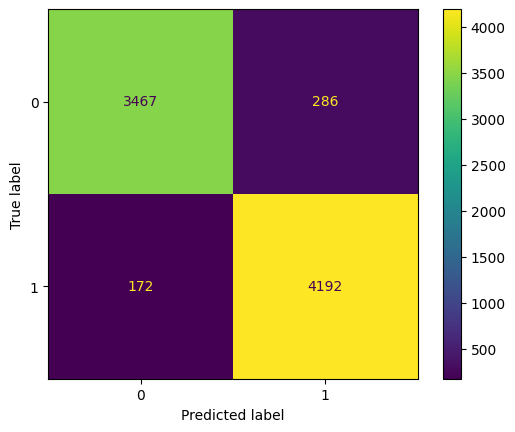

In [106]:
import sklearn.metrics
sklearn.metrics.ConfusionMatrixDisplay.from_estimator(naive_byas_model, x_test_final, y_test)

In [141]:
import pickle
with open("naive_byas_model.pkl", "wb") as f:
    pickle.dump(naive_byas_model, f)

# Decision Tree

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [108]:
treemodel=DecisionTreeClassifier()

In [111]:
parameter = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
decision_classifier = GridSearchCV(treemodel,param_grid = parameter ,scoring='accuracy',cv=5)

In [112]:
decision_classifier.fit(x_train_final,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [113]:
print(decision_classifier.best_score_)

0.9193409300893134


In [117]:
print(decision_classifier.best_params_)

{'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [122]:
decision_tree_model = DecisionTreeClassifier(criterion= 'gini', max_depth= 50, min_samples_leaf= 1, min_samples_split= 5)
decision_tree_model.fit(x_train_final,y_train)

DecisionTreeClassifier(max_depth=50, min_samples_split=5)

In [124]:
decision_tree_y_predict = decision_tree_model.predict(x_test_final)

In [125]:
descision_tree_accurecy = accuracy_score(decision_tree_y_predict,y_test)
descision_tree_accurecy

0.9200443513613404

In [126]:
decision_tree_classification_report = classification_report(decision_tree_y_predict,y_test)
print(decision_tree_classification_report)

              precision    recall  f1-score   support

           0       0.94      0.89      0.92      3966
           1       0.90      0.95      0.92      4151

    accuracy                           0.92      8117
   macro avg       0.92      0.92      0.92      8117
weighted avg       0.92      0.92      0.92      8117



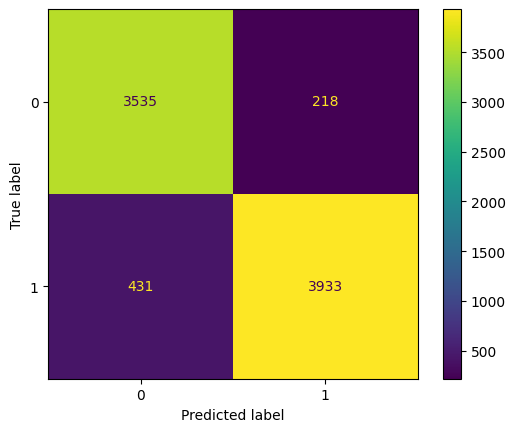

In [127]:
import sklearn.metrics
sklearn.metrics.ConfusionMatrixDisplay.from_estimator(decision_tree_model, x_test_final, y_test)

In [142]:
import pickle
with open("decision_tree_model.pkl", "wb") as f:
    pickle.dump(decision_tree_model, f)

# Random Forest

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [129]:
random_forest = RandomForestClassifier(class_weight = 'balanced')
parameter = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
random_forest_cv = GridSearchCV(random_forest,param_grid = parameter,cv = 5 , scoring='accuracy')

In [130]:
random_forest_cv.fit(x_train_final,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [131]:
print(random_forest_cv.best_params_)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [133]:
print(random_forest_cv.best_score_)

0.9535571296581461


In [132]:
random_forest = RandomForestClassifier(max_depth = None,min_samples_leaf = 1, min_samples_split= 10, n_estimators = 200)
random_forest.fit(x_train_final,y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=200)

In [134]:
random_forest_predict_y = random_forest.predict(x_test_final)

In [135]:
random_forest_acc = accuracy_score(random_forest_predict_y,y_test)
random_forest_acc

0.9524454847850191

In [136]:
random_forest_classification_report = classification_report(random_forest_predict_y,y_test)
print(random_forest_classification_report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3679
           1       0.96      0.95      0.96      4438

    accuracy                           0.95      8117
   macro avg       0.95      0.95      0.95      8117
weighted avg       0.95      0.95      0.95      8117



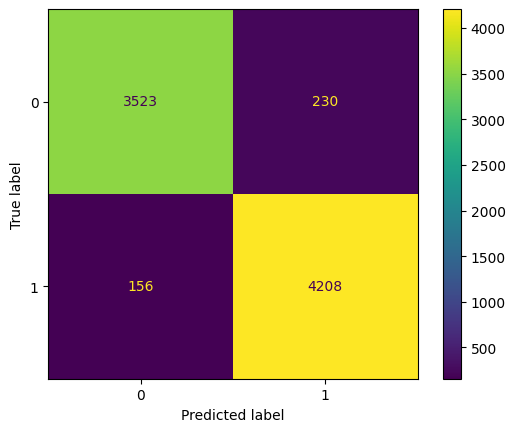

In [137]:
sklearn.metrics.ConfusionMatrixDisplay.from_estimator(random_forest, x_test_final, y_test)

In [143]:
import pickle
with open("random_forest.pkl", "wb") as f:
    pickle.dump(random_forest, f)

# Applying Deep Laearning

In [1]:
import tensorflow as tf
import keras
import warnings
warnings.filterwarnings('ignore')

In [42]:
from keras.layers import Input, Dense, Dropout, Activation
from keras.models import Model 

In [43]:
x_train_final.shape[1]

5000

In [44]:
input_ = Input(shape=x_train_final.shape[1])

In [45]:
layer_1 = Dense(7000,activation = 'relu',kernel_initializer = keras.initializers.he_normal(seed = 0)) (input_)
layer_2 = Dense(6500,activation = 'relu',kernel_initializer = keras.initializers.he_normal(seed = 0)) (layer_1)
layer_3 = Dense(5000,activation = 'relu',kernel_initializer = keras.initializers.he_normal(seed = 0)) (layer_2)
layer_4 = Dense(5500,activation = 'relu',kernel_initializer = keras.initializers.he_normal(seed = 0)) (layer_3)
layer_5 = Dense(4500,activation = 'relu',kernel_initializer = keras.initializers.he_normal(seed = 0)) (layer_4)
layer_6 = Dense(4000,activation = 'relu',kernel_initializer = keras.initializers.he_normal(seed = 0)) (layer_5)
layer_7 = Dense(3500,activation = 'relu',kernel_initializer = keras.initializers.he_normal(seed = 0)) (layer_6)
layer_8 = Dense(1000,activation = 'relu',kernel_initializer = keras.initializers.he_normal(seed = 0)) (layer_7)
layer_9 = Dense(500,activation = 'relu',kernel_initializer = keras.initializers.he_normal(seed = 0)) (layer_8)
layer_10 = Dense(200,activation = 'relu',kernel_initializer = keras.initializers.he_normal(seed = 0)) (layer_9)
output_ = Dense(1,activation = 'sigmoid',kernel_initializer = keras.initializers.he_normal(seed = 0)) (layer_10)

In [46]:
model = Model(inputs = input_, outputs= output_)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5000)]            0         
                                                                 
 dense (Dense)               (None, 7000)              35007000  
                                                                 
 dense_1 (Dense)             (None, 6500)              45506500  
                                                                 
 dense_2 (Dense)             (None, 5000)              32505000  
                                                                 
 dense_3 (Dense)             (None, 5500)              27505500  
                                                                 
 dense_4 (Dense)             (None, 4500)              24754500  
                                                                 
 dense_5 (Dense)             (None, 4000)              180040

In [47]:
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [49]:

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0.002,  patience=2, mode='auto', verbose=1, restore_best_weights= True)

reducelr = ReduceLROnPlateau(monitor='val_loss', factor= 0.5, patience=1, verbose= 1, min_delta= 0.002)

model.compile(optimizer= tf.keras.optimizers.Adam(0.0005), loss = 'binary_crossentropy', metrics = ["accuracy"])
model.fit(x_train_final, y_train.values.reshape((-1,1)), epochs = 1000,  validation_split=0.33,batch_size=100, shuffle=True, callbacks= [earlystopper, reducelr] )

Epoch 1/1000
218/218 [==============================] - 489s 2s/step - loss: 0.0690 - accuracy: 0.9793 - val_loss: 0.0609 - val_accuracy: 0.9780 - lr: 5.0000e-04
Epoch 2/1000
218/218 [==============================] - ETA: 0s - loss: 0.0274 - accuracy: 0.9926
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
218/218 [==============================] - 470s 2s/step - loss: 0.0274 - accuracy: 0.9926 - val_loss: 0.1063 - val_accuracy: 0.9770 - lr: 5.0000e-04
Epoch 3/1000
218/218 [==============================] - ETA: 0s - loss: 0.0092 - accuracy: 0.9966Restoring model weights from the end of the best epoch: 1.

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
218/218 [==============================] - 483s 2s/step - loss: 0.0092 - accuracy: 0.9966 - val_loss: 0.1850 - val_accuracy: 0.9769 - lr: 2.5000e-04
Epoch 3: early stopping


In [50]:
import pickle
with open("ANN_model.pkl","wb") as f:
    pickle.dump(model,f)

In [58]:
model.save('dense.keras')

In [51]:
y_train_predict = model.predict(x_train_final)
y_test_predict = model.predict(x_test_final)

254/254 [==============================] - 24s 95ms/step


In [52]:
y_train

0        1
1        1
2        0
3        1
4        0
        ..
32465    0
32466    0
32467    0
32468    1
32469    1
Name: label, Length: 32470, dtype: int64

In [53]:
y_train_predict

array([[9.9082989e-01],
       [1.0000000e+00],
       [2.8923398e-03],
       ...,
       [8.1113620e-05],
       [9.9903202e-01],
       [9.9994123e-01]], dtype=float32)

In [54]:
y_train_predict.reshape(1,-1)[0]

array([9.9082989e-01, 1.0000000e+00, 2.8923398e-03, ..., 8.1113620e-05,
       9.9903202e-01, 9.9994123e-01], dtype=float32)

In [55]:
y_train_predict = np.where(y_train_predict.reshape(1,-1)[0]>0.5,1,0)
y_train_predict

array([1, 1, 0, ..., 0, 1, 1])

In [56]:
y_test_predict = np.where(y_test_predict.reshape(1,-1)[0]>0.5,1,0)
y_test_predict

array([1, 1, 1, ..., 1, 0, 0])

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_predict ))
print(classification_report(y_test,y_test_predict ))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     14910
           1       0.99      0.98      0.99     17560

    accuracy                           0.99     32470
   macro avg       0.99      0.99      0.99     32470
weighted avg       0.99      0.99      0.99     32470

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      3753
           1       0.96      0.97      0.96      4364

    accuracy                           0.96      8117
   macro avg       0.96      0.96      0.96      8117
weighted avg       0.96      0.96      0.96      8117



# Model Deploy

In [155]:
import os
import pickle
import numpy as np
from tensorflow.keras.models import load_model

# Load vectorizers
with open("vectorizer_text.pkl", "rb") as f:
    vectorizer_text = pickle.load(f)

with open("vectorizer_title.pkl", "rb") as f:
    vectorizer_title = pickle.load(f)

with open("ANN_model.pkl", "rb") as f:
    ANN_model = pickle.load(f)




In [156]:
# Function to predict whether news is fake or real
def predict_fake_news(title, text):
    # Transform the input using the loaded vectorizers
    title_transformed = vectorizer_title.transform([title])
    text_transformed = vectorizer_text.transform([text])

    # Combine the transformed inputs
    input_features = np.hstack((title_transformed.toarray(), text_transformed.toarray()))

    # Predict using the loaded model
    prediction = ANN_model.predict(input_features)[0]
    print(prediction)
    # Display the prediction result
    if prediction >= 0.5:
        return "The news is likely real"
    else:
        return "The news is likely fake"

# Example usage
title = "London Universities Launch ‘Study London’ Campaign To Welcome & Reassure International Students"
text=''' London's universities have launched a new campaign, 'Study London,' aimed at reassuring international students of their welcome at these institutions. According to Erudera, this initiative by London Higher, the body representing the capital's higher education institutions, comes in response to the UK government's recent restrictions on international students.

Safe destination for education

Diana Beech, Chief Executive Officer of London Higher, emphasised that the campaign seeks to restore confidence in London as a welcoming and safe destination for education. “'Study London’ is about using the best tool the UK has – the draw of its capital city and world-leading higher education institutions – to boost its international competitiveness. We will see it as a success not only if this campaign sees more students applying to London, but also to universities right across the UK,” Beech said in a statement.
This campaign follows significant changes to the UK’s immigration policies introduced earlier this year. The UK government announced new rules aimed at reducing migration, which included preventing most international students from bringing family members to the UK. Government estimates suggest that these measures could reduce migration by about 300,000 people. Consequently, the first quarter of 2024 saw an 80 percent drop in applications by student dependents and 26,000 fewer student visa applications compared to the same period last year, as reported by Erudera.'''
result = predict_fake_news(title, text)
print(result)


1/1 [==============================] - 1s 1s/step
[0.989764]
The news is likely real


In [157]:
with open("logistic_regression_model.pkl", "rb") as f:
    logistic_regression_model = pickle.load(f)

with open("naive_byas_model.pkl", "rb") as f:
    naive_byas_model = pickle.load(f)

with open("decision_tree_model.pkl", "rb") as f:
    decision_tree_model = pickle.load(f)

with open("random_forest.pkl", "rb") as f:
    random_forest = pickle.load(f)


In [167]:
# Function to predict whether news is fake or real
def predict_fake_news2(title, text):
    # Transform the input using the loaded vectorizers
    title_transformed = vectorizer_title.transform([title])
    text_transformed = vectorizer_text.transform([text])

    # Combine the transformed inputs
    input_features = np.hstack((title_transformed.toarray(), text_transformed.toarray()))

    # Predict using the loaded model
    
    prediction1 = ANN_model.predict(input_features)[0]
    
    predictions=[prediction1]

    # Aggregate predictions
    avg_prediction = np.mean(predictions)
    print(predictions)
    # Display the prediction result
    if avg_prediction >= 0.5:
        return "The news is likely real"
    else:
        return "The news is likely fake"

# Example usage
title = "Newspaper Apologises For 'EVM Unlocked Using Mobile Phone' Story But Rahul Gandhi Yet To Remove His Post"
text=''' A day after publishing a sensation report that claimed that a relative of newly elected Shiv Sena MP Ravindra Waikar was able to connect to EVMs using his mobile phone, Mumbai-based Mid-Day newspaper has issued a clarification on Monday (17 June).

The report claimed that a mobile phone was used for generating the OTP that unlocked the EVM machine, which was used inside the NESCO Centre during the counting of votes on 4 June.

The report titled 'Waikar's kin had phone that unlocks EVM' stated that police have launched an investigation into the case and sent the phone for examination to the Forensic Science Laboratory (FSL).

However, in a clarification issued today, Mid-Day said, "The report 'Waikar's kin had phone that unlocks EVM' (page 6, June 16) inadvertently erroneously mentioned that the accused person used his mobile phone to generate an OTP to unlock EVMs. The error is regretted".

However, Vandana Suryavanshi, returning officer of the Mumbai North West Lok Sabha constituency, rejected the report as “false news” and said a defamation notice had been issued to the publication.

The report was cited by many Opposition leaders, including Rahul Gandhi, alleging 'serious concerns' about 'transparency' in India's electoral process.

"EVMs in India are a "black box," and nobody is allowed to scrutinise them. Serious concerns are being raised about transparency in our electoral process. Democracy ends up becoming a sham and prone to fraud when institutions lack accountability," Rahul Gandhi wrote in a post on X, citing the report.

However, Gandhi is yet to remove his post after the newspaper issued the clarification.'''
result = predict_fake_news2(title, text)
print(result)

1/1 [==============================] - 0s 112ms/step
[array([0.926468], dtype=float32)]
The news is likely real


In [168]:
import numpy as np

def predict_fake_news2(title, text, vectorizer_title, vectorizer_text, logistic_regression_model, naive_bayes_model, decision_tree_model, random_forest_model, ANN_model):
    title_transformed = vectorizer_title.transform([title])
    text_transformed = vectorizer_text.transform([text])

    input_features = np.hstack((title_transformed.toarray(), text_transformed.toarray()))

    prediction1 = logistic_regression_model.predict(input_features)[0]
    prediction2 = naive_byas_model.predict(input_features)[0]
    prediction3 = decision_tree_model.predict(input_features)[0]
    prediction4 = random_forest_model.predict(input_features)[0]
    prediction5 = ANN_model.predict(input_features)[0]
    
    avg_prediction = (prediction1 + prediction2 + prediction3 + prediction4 + prediction5) / 5
    print(prediction1,prediction2,prediction3,prediction4,prediction5)
    if avg_prediction >= 0.5:
        return "The news is likely real"
    else:
        return "The news is likely fake"

title = input("enter title")
text = input("enter text")

result = predict_fake_news2(title, text, vectorizer_title, vectorizer_text, logistic_regression_model, naive_byas_model, decision_tree_model, random_forest, ANN_model)
print(result)


enter title Newspaper Apologises For 'EVM Unlocked Using Mobile Phone' Story But Rahul Gandhi Yet To Remove His Post
enter text A day after publishing a sensation report that claimed that a relative of newly elected Shiv Sena MP Ravindra Waikar was able to connect to EVMs using his mobile phone, Mumbai-based Mid-Day newspaper has issued a clarification on Monday (17 June).  The report claimed that a mobile phone was used for generating the OTP that unlocked the EVM machine, which was used inside the NESCO Centre during the counting of votes on 4 June.  The report titled 'Waikar's kin had phone that unlocks EVM' stated that police have launched an investigation into the case and sent the phone for examination to the Forensic Science Laboratory (FSL).  However, in a clarification issued today, Mid-Day said, "The report 'Waikar's kin had phone that unlocks EVM' (page 6, June 16) inadvertently erroneously mentioned that the accused person used his mobile phone to generate an OTP to unlock 

1/1 [==============================] - 0s 110ms/step
0 1 0 0 [0.926468]
The news is likely fake


In [185]:
import numpy as np

# Function to predict whether news is fake or real using multiple models
def predict_fake_news2(title, text, vectorizer_title, vectorizer_text, logistic_regression_model, naive_bayes_model, decision_tree_model, random_forest_model, ANN_model):
    # Transform the input using the loaded vectorizers
    title_transformed = vectorizer_title.transform([title])
    text_transformed = vectorizer_text.transform([text])

    # Combine the transformed inputs
    input_features = np.hstack((title_transformed.toarray(), text_transformed.toarray()))

    # Predict using the loaded models
    prediction1 = logistic_regression_model.predict(input_features)[0]
    prediction2 = naive_byas_model.predict(input_features)[0]
    prediction3 = decision_tree_model.predict(input_features)[0]
    prediction4 = random_forest_model.predict(input_features)[0]
    prediction5 = ANN_model.predict(input_features)[0]

    # Aggregate predictions
    # avg_prediction = max(prediction1 , prediction2 , prediction3 , prediction4 , prediction5)
    print(prediction1,prediction2,prediction3,prediction4,prediction5)
    # Display the prediction result
    if prediction1 >= 0.5 or prediction2 >= 0.5 or prediction3 >= 0.5 or prediction4 >= 0.5 or prediction5 >= 0.5:
        
        return "The news is likely real"
    else:
        return "The news is likely fake"

# Example usage
title = input("enter title")
text = input("enter text")

result = predict_fake_news2(title, text, vectorizer_title, vectorizer_text, logistic_regression_model, naive_byas_model, decision_tree_model, random_forest, ANN_model)
print(result)


enter title Newspaper Apologises For 'EVM Unlocked Using Mobile Phone' Story But Rahul Gandhi Yet To Remove His Post
enter text A day after publishing a sensation report that claimed that a relative of newly elected Shiv Sena MP Ravindra Waikar was able to connect to EVMs using his mobile phone, Mumbai-based Mid-Day newspaper has issued a clarification on Monday (17 June).  The report claimed that a mobile phone was used for generating the OTP that unlocked the EVM machine, which was used inside the NESCO Centre during the counting of votes on 4 June.  The report titled 'Waikar's kin had phone that unlocks EVM' stated that police have launched an investigation into the case and sent the phone for examination to the Forensic Science Laboratory (FSL).  However, in a clarification issued today, Mid-Day said, "The report 'Waikar's kin had phone that unlocks EVM' (page 6, June 16) inadvertently erroneously mentioned that the accused person used his mobile phone to generate an OTP to unlock 

1/1 [==============================] - 0s 126ms/step
0 1 0 0 [0.926468]
The news is likely real


In [217]:
import numpy as np

# Function to predict whether news is fake or real using multiple models
def predict_fake_news2(title, text, vectorizer_title, vectorizer_text, logistic_regression_model, naive_bayes_model, decision_tree_model, random_forest_model, ANN_model):
    # Transform the input using the loaded vectorizers
    title_transformed = vectorizer_title.transform([title])
    text_transformed = vectorizer_text.transform([text])

    # Combine the transformed inputs
    input_features = np.hstack((title_transformed.toarray(), text_transformed.toarray()))

    # Predict using the loaded models
    prediction1 = logistic_regression_model.predict(input_features)[0]
    prediction2 = naive_byas_model.predict(input_features)[0]
    prediction3 = decision_tree_model.predict(input_features)[0]
    prediction4 = random_forest_model.predict(input_features)[0]
    prediction5 =  int(np.where(ANN_model.predict(input_features)[0]>=0.5,1,0))
   
    # Aggregate predictions
    # avg_prediction = max(prediction1 , prediction2 , prediction3 , prediction4 , prediction5)
    my_tuple=(prediction1,prediction2,prediction3,prediction4,prediction5)
    max_occurrence = max(my_tuple, key=my_tuple.count)

    # Display the prediction result
    if max_occurrence==1:
        
        return "The news is likely real"
    else:
        return "The news is likely fake"

# Example usage
title = input("enter title")
text = input("enter text")

result = predict_fake_news2(title, text, vectorizer_title, vectorizer_text, logistic_regression_model, naive_byas_model, decision_tree_model, random_forest, ANN_model)
print(result)



enter title US Navy on red alert as us nuclear submarine passes Miami coast
enter text Welcome to DailyMail.com's U.S. politics blog, with the biggest stories from Washington and the corridors of power.  The White House is still fighting back against videos of President Joe Biden's awkward interactions they claim are 'cheapfakes'.  The Biden administration's relations with Israel has also reached a new tense juncture after Benjamin Netanyahu claimed the U.S. had blocked weapons shipments.  Both Democrats and Republicans are also waking up as primary results roll in from key states including Virginia and Georgia.


1/1 [==============================] - 0s 157ms/step
The news is likely real


In [2]:
!pip freeze > requirements.txt


In [9]:
train_data1.loc[1881][2]

C:\Users\SNEHANGSHU\AppData\Local\Temp\ipykernel_11992\17251441.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_data1.loc[1881][2]


'On Sunday, Republican Senator Ron Johnson was vocal about punishing people with pre-existing conditions. He suggested that they deserved to have higher premiums because having a preexisting condition is like getting into a car accident.While discussing the Republican health care bill with Meet the Press host Chuck Todd, Johnson thinks that he knows the answer to why insurance companies are abandoning certain markets, but that  nobody wants to talk about it. The Republican from Wisconsin suggested the reason was the Obamacare rules that protected Americans from preexisting conditions, rather than market instability creating by Republicans. We know why those premiums doubled. We ve done something with our health care system that you would never think about doing, for example, with auto insurance, where you would require auto insurance companies to sell a policy to somebody after they crash their car. States that have  guarantees for preexisting conditions, it crashes their markets,  he 